In [1]:
# Umesh Dhakal  
## MSCS634L2  
## Lab 2: Classification Using KNN and RNN Algorithms

In [2]:
# All the imports we need to run the program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score


In [3]:
# loading the wine dataset
wine_data = load_wine()

# data
x_data = wine_data.data
y_label = wine_data.target

print("x_data shape:", x_data.shape)
print("y_label shape:", y_label.shape)

# feature names
print("\nFeature names:")
for i, name in enumerate(wine_data.feature_names):
    print(f"{i+1}. {name}")

# class distribution
class_val, class_count = np.unique(y_label, return_counts=True)
print("\nClass distribution:")
for c, cnt in zip(class_val, class_count):
    print(f"Class {c} ({wine_data.target_names[c]}): {cnt}")

# Table view
wine_df = pd.DataFrame(x_data, columns=wine_data.feature_names)
wine_df["class_label"] = y_label
wine_df.head()

# Training and testing data
x_train, x_test, y_train, y_test = train_test_split(
    x_data,
    y_label,
    test_size=0.2,
    random_state=42,
    stratify=y_label
)

print("\nTrain size:", x_train.shape[0])
print("Test size:", x_test.shape[0])


x_data shape: (178, 13)
y_label shape: (178,)

Feature names:
1. alcohol
2. malic_acid
3. ash
4. alcalinity_of_ash
5. magnesium
6. total_phenols
7. flavanoids
8. nonflavanoid_phenols
9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

Class distribution:
Class 0 (class_0): 59
Class 1 (class_1): 71
Class 2 (class_2): 48

Train size: 142
Test size: 36


In [4]:
k_list = [1, 5, 11, 15, 21]
knn_acc_list = []

for k_val in k_list:
    knn_model = Pipeline([
        ("scale", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k_val))
    ])
    
    # training the data
    knn_model.fit(x_train, y_train)
    
    # testing the data
    y_pred = knn_model.predict(x_test)
    acc_val = accuracy_score(y_test, y_pred)
    
    knn_acc_list.append(acc_val)
    print("KNN k =", k_val, "accuracy =", acc_val)


KNN k = 1 accuracy = 0.9722222222222222
KNN k = 5 accuracy = 0.9722222222222222
KNN k = 11 accuracy = 1.0
KNN k = 15 accuracy = 1.0
KNN k = 21 accuracy = 1.0


In [5]:
radius_list = [350, 400, 450, 500, 550, 600]
rnn_acc_list = []

# fallback class if no neighbors found
train_val, train_cnt = np.unique(y_train, return_counts=True)
common_class = int(train_val[np.argmax(train_cnt)])

for rad_val in radius_list:
    rnn_model = Pipeline([
        ("scale", StandardScaler()),
        ("rnn", RadiusNeighborsClassifier(
            radius=rad_val,
            outlier_label=common_class
        ))
    ])
    
    # training
    rnn_model.fit(x_train, y_train)
    
    # testing
    y_pred = rnn_model.predict(x_test)
    acc_val = accuracy_score(y_test, y_pred)
    
    rnn_acc_list.append(acc_val)
    print("RNN radius =", rad_val, "accuracy =", acc_val)


RNN radius = 350 accuracy = 0.3888888888888889
RNN radius = 400 accuracy = 0.3888888888888889
RNN radius = 450 accuracy = 0.3888888888888889
RNN radius = 500 accuracy = 0.3888888888888889
RNN radius = 550 accuracy = 0.3888888888888889
RNN radius = 600 accuracy = 0.3888888888888889


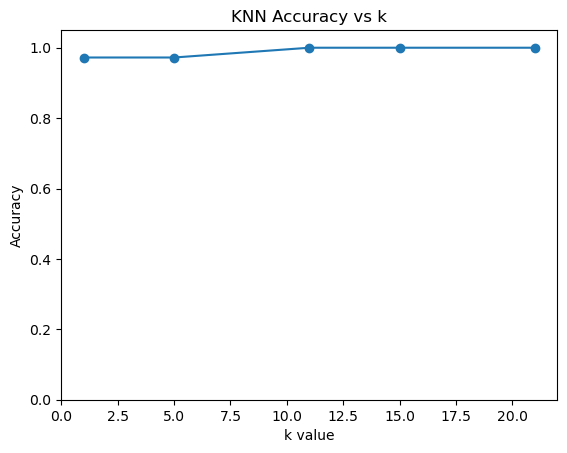

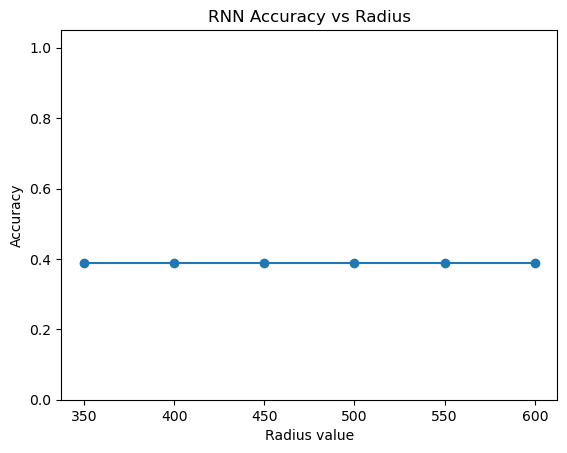

In [6]:
# KNN plot
plt.figure()
plt.plot(k_list, knn_acc_list, marker='o')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.ylim(0, 1.05)
plt.show()

# RNN plot
plt.figure()
plt.plot(radius_list, rnn_acc_list, marker='o')
plt.xlabel("Radius value")
plt.ylabel("Accuracy")
plt.title("RNN Accuracy vs Radius")
plt.ylim(0, 1.05)
plt.show()
